# Excercise 1 (Math fun)

## Problem 1
__Given:__ Two positive integers a=100 and b=200

__Return:__ The sum of all odd integers from a through b, inclusively

In [1]:
sum([_ for _ in range(101,200,2)])

7500

In [2]:
from functools import reduce
reduce((lambda x, y: x + y), range(101,200,2))

7500

## Problem 2
__Given:__ If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

__Return:__ Find the sum of all the multiples of 3 or 5 below 1000.

In [3]:
sum([_ for _ in range(0,1000) if (not(_%3) or not(_%5))])

233168

In [4]:
sum([i for i in range(1000) if i%3==0 or i%5==0])

233168

## Problem 3
__Given:__ A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

__Return:__ Find the largest palindrome made from the product of two 3-digit numbers.

__Hint:__ To learn how to check for palindromism try out "lagerregal"[::-1]

In [42]:
collect = []
for i in range(100,999):
    for j in range(i,1000):
        prod = str(i*j)
        if prod==prod[::-1]:
            collect.append((i*j,i,j))
sorted(collect, key = lambda x: x[0], reverse = True)[0]

(906609, 913, 993)

## Problem 4
__Given:__ Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be: 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

__Return:__ By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

__Hint:__

In [6]:
def fib():
    a, b = 1, 2
    while 1:
        yield(a)
        a, b = b, a + b

In [7]:
fib_sum = 0
for x in fib():
    if x>4000000:
        break
    if not(x%2):
        fib_sum+=x
fib_sum

4613732

In [8]:
fib_sum = 0
count = 0
for f in fib():
    if f>4*10**6:
        break
    elif f%2==0:
        fib_sum += f
fib_sum

4613732

# Excercise 2 (string/bioinformatics fun)

## Problem 1
transcribe the DNA into RNA

In [9]:
s='GATGGAACTTGACTACGTAAATT'

In [10]:
s.replace('T','U')

'GAUGGAACUUGACUACGUAAAUU'

## Problem 2
report the nucleotide counts for each sequence individually

__hint__: split at '>'

In [11]:
s = '''>sequence 1
CCTGCGGAAGATCGGCACTAGAATAGCCAGAACCGTTTCTCTGAGGCTTCCGGCCTTCCC
TCCCACTAATAATTCTGAGG
>sequence 2
CCATCGGTAGCGCATCCTTAGTCCAATTAAGTCCCTATCCAGGCGCTCCGCCGAAGGTCT
ATATCCATTTGTCAGCAGACACGC
>sequence 3
CCACCCTCGTGGTATGGCTAGGCATTCAGGAACCGGAGAACGCTTCAGACCAGCCCGGAC
TGGGAACCTGCGGGCAGTAGGTGGAAT
'''

In [12]:
from collections import Counter

In [13]:
for seq in s.split('>')[1:]:
    seq = seq.split('\n')
    print(seq[0], Counter(list(''.join(seq[1:]))))

sequence 1 Counter({'C': 25, 'T': 19, 'G': 18, 'A': 18})
sequence 2 Counter({'C': 28, 'T': 20, 'A': 19, 'G': 17})
sequence 3 Counter({'G': 29, 'C': 24, 'A': 20, 'T': 14})


## Problem 3
convert the list of gene symbols into entrez and ensembl identifier

__hint 1__ split at newline

__hint 2__ use use mygene

In [3]:
symbols = '''BRD4
CDK2
KRAS
TP53
MYC
CTNNB1
ATAD2
PLK1
'''

In [4]:
import mygene

In [5]:
symbols = symbols.split('\n')
symbols.remove('')

In [6]:
mg = mygene.MyGeneInfo()

In [8]:
mg.querymany(symbols, scopes='symbol', species=9606, fields = ['entrezgene','ensembl.gene'], as_dataframe = True)

querying 1-8...done.
Finished.


,_id,_score,entrezgene,ensembl.gene
query,,,,
BRD4,23476,90.992455,23476,ENSG00000141867
CDK2,1017,86.533280,1017,ENSG00000123374
KRAS,3845,88.561424,3845,ENSG00000133703
TP53,7157,87.215040,7157,ENSG00000141510
MYC,4609,86.693140,4609,ENSG00000136997
CTNNB1,1499,84.942560,1499,ENSG00000168036
ATAD2,29028,87.987816,29028,ENSG00000156802
PLK1,5347,85.326960,5347,ENSG00000166851


## Problem 4
translate RNA into protein
AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA

__Hint:__ use the RNA codon [table](http://rosalind.info/glossary/rna-codon-table/)

In [9]:
RNA = 'AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA'

In [10]:
import numpy as np
import re

In [11]:
trans = '''UUU F      CUU L      AUU I      GUU V
UUC F      CUC L      AUC I      GUC V
UUA L      CUA L      AUA I      GUA V
UUG L      CUG L      AUG M      GUG V
UCU S      CCU P      ACU T      GCU A
UCC S      CCC P      ACC T      GCC A
UCA S      CCA P      ACA T      GCA A
UCG S      CCG P      ACG T      GCG A
UAU Y      CAU H      AAU N      GAU D
UAC Y      CAC H      AAC N      GAC D
UAA Stop   CAA Q      AAA K      GAA E
UAG Stop   CAG Q      AAG K      GAG E
UGU C      CGU R      AGU S      GGU G
UGC C      CGC R      AGC S      GGC G
UGA Stop   CGA R      AGA R      GGA G
UGG W      CGG R      AGG R      GGG G'''

In [12]:
tmp = np.concatenate([list(filter(None,ele.split())) for ele in trans.split('\n')])
trans_d = {}
for v, w in zip(tmp[:-1:2], tmp[1::2]):
    trans_d[v]=w

In [13]:
''.join([trans_d[triplet] for triplet in re.findall('...',RNA) if trans_d[triplet] != 'Stop'])

'MAMAPRTEINSTRING'

# Excercise 3 (Data science fun)

## Problem 1
What is the pearson correlation of MDM2 copy number and it's expression in CCLE cell lines? Also generate a scatter plot!

__hints__:
* download CN data from [depmap](https://ndownloader.figshare.com/files/16757699)
* join MDM2 copynumber data to expression
* find the pearson correlation function in scipy stats

In [33]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
!wget https://ndownloader.figshare.com/files/16757699 -O ../data/cn.csv

--2019-09-23 19:23:34--  https://ndownloader.figshare.com/files/16757699
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.251.114.113, 54.229.25.187, 54.229.52.89, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.251.114.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/16757699/CCLE_gene_cn.csv [following]
--2019-09-23 19:23:34--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/16757699/CCLE_gene_cn.csv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.21.186
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.21.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 644175416 (614M) [text/csv]
Saving to: ‘../data/cn.csv’

../data/cn.csv      100%[===================>] 614.33M  63.9MB/s    in 9.8s    

2019-09-23 19:23:44 (63.0 MB/s) - ‘../data/cn.csv’ saved [644175416/644175416]


In [19]:
cn = pd.read_csv('../data/cn.csv', index_col = 0)
expr = pd.read_csv('../data/expression.csv', index_col = 0)

In [22]:
cn.columns = [ele.split(' ')[0] for ele in cn.columns]
expr.columns = [ele.split(' ')[0] for ele in expr.columns]

In [27]:
joined = expr[['MDM2']].join(cn[['MDM2']], lsuffix='_expr', rsuffix='_cn')

In [29]:
print('easy:', joined.corr())

easy:            MDM2_expr   MDM2_cn
MDM2_expr   1.000000  0.562717
MDM2_cn     0.562717  1.000000


In [31]:
joined = joined.dropna()
print('using scipy (and with p-value):', pearsonr(joined.MDM2_expr, joined.MDM2_cn))

using scipy (and with p-value): (0.5627166170544289, 9.487018015460938e-101)


In [36]:
2*(2**1)

4

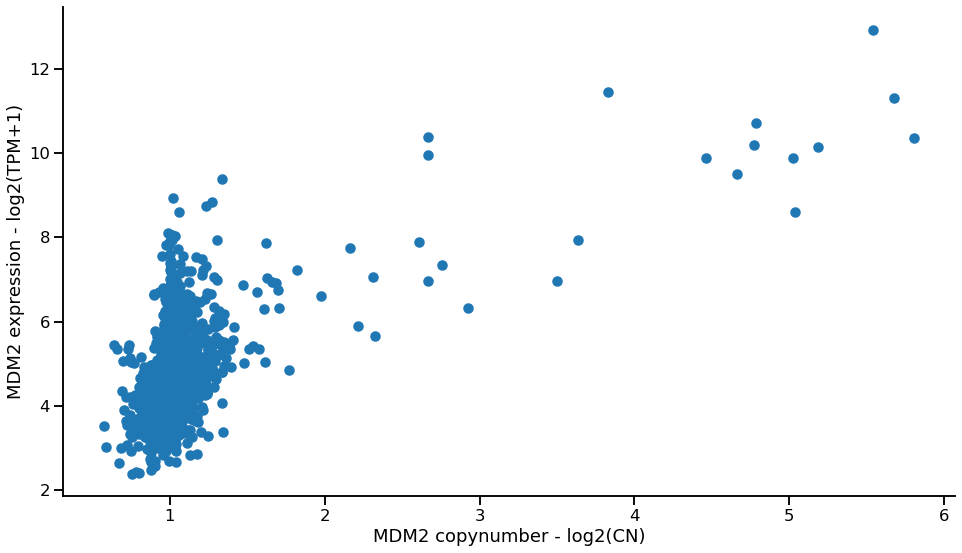

In [44]:
sns.set_context('talk')
plt.figure(figsize=(16,9))
plt.scatter(data = joined, x = 'MDM2_cn', y = 'MDM2_expr')
plt.xlabel('MDM2 copynumber - log2(CN)')
plt.ylabel('MDM2 expression - log2(TPM+1)')
sns.despine()

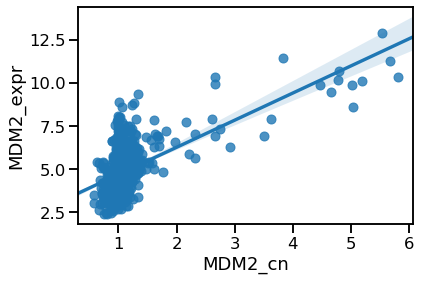

In [46]:
# just to show an alternative
sns.regplot(data = joined, x = 'MDM2_cn', y = 'MDM2_expr',  )

## Problem 2
In which tumor/tissue type within the CCLE dataset is the highest expression median expression of KLK3?

__hints__:
* join sample_info to expression
* use groupby apply
* generate a boxplot with the tissuetype as categories

In [50]:
si = pd.read_csv('../data//sample_info.csv', index_col = 0)

In [52]:
joined = expr[['KLK3']].join(si)

In [74]:
order_klk3 = joined.groupby('lineage')[['KLK3']].median().sort_values(by = 'KLK3', ascending = False).index

In [68]:
joined.groupby('lineage')[['KLK3']].median().sort_values(by = 'KLK3', ascending = False)

,KLK3
lineage,
prostate,2.904666
colorectal,0.150560
peripheral_nervous_system,0.028569
uterus,0.014355
pancreas,0.014355
embryo,0.014355
bile_duct,0.007178
soft_tissue,0.000000
multiple_myeloma,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

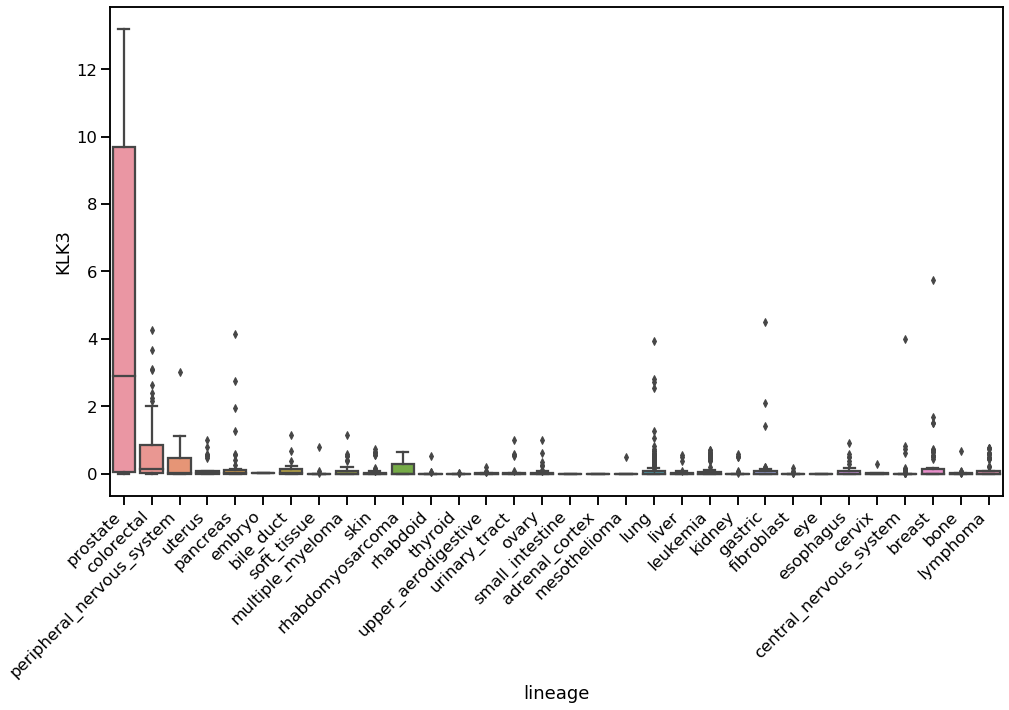

In [75]:
sns.set_context('talk')
plt.figure(figsize = (16,9))
sns.boxplot(data = joined, x = 'lineage', y = 'KLK3', order = order_klk3)
plt.xticks(rotation = 45,ha="right" )

## Problem 3
Generate a PCA plot using the top100 most varying genes (regarding expression)! Color cell lines according to tissue type

__hints__:
* read and use https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

## Problem 4
Generate a umap projection on same top100 most varying genes (also with tissue type as colors)

__hints__:
* read and use https://umap-learn.readthedocs.io/en/latest
* use euclidean distance